<a href="https://colab.research.google.com/github/Codeginner/machineLearning-task/blob/main/8th%20Week%20Tasks/SVR%20Using%20Salary%20Dataset/SVR%20Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
# Menghubungkan Colab dengan Google Drive
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Prompt: beri kode untuk membaca dataset menjadi dataframe

In [106]:
# Membuka dataset yang akan digunakan
import pandas as pd

# Ganti 'file_path.csv' dengan jalur file CSV sesuai kebutuhan Anda
file_path = '/content/gdrive/MyDrive/Dataset/Salary_Data.csv'

# Membaca file CSV menjadi DataFrame
df = pd.read_csv(file_path)

# Tampilkan DataFrame
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [107]:
# Periksa dataset apakah masih ada kolom yang memiliki nilai NaN dan drop baris kosong untuk mempermudah pelatihan model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [108]:
# Drop baris dengan nilai NaN
df_cleaned = df.dropna()

In [109]:
# Cek kembali baris dengan nilai NaN yang sudah di-drop
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


<ipython-input-110-a2d88ca6b5ea>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender'] = le_gender.fit_transform(df_cleaned['Gender'])
<ipython-input-110-a2d88ca6b5ea>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Education Level'] = le_education.fit_transform(df_cleaned['Education Level'])
<ipython-input-110-a2d88ca6b5ea>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

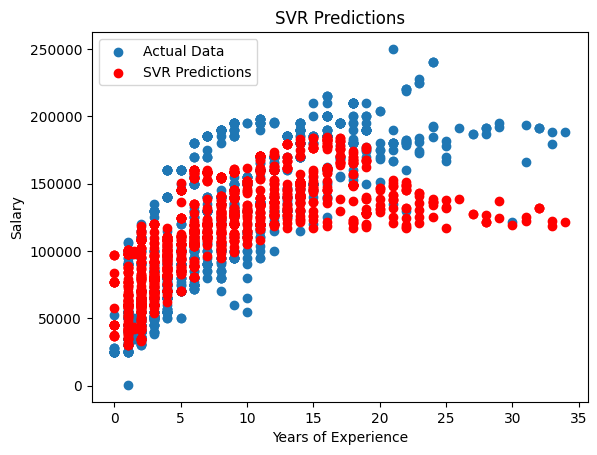

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# Encode variabel kategorikal
le_gender = LabelEncoder()
le_education = LabelEncoder()
le_job_title = LabelEncoder()

# Mengubah nilai variabel kategorikal menjadi angka
df_cleaned['Gender'] = le_gender.fit_transform(df_cleaned['Gender'])
df_cleaned['Education Level'] = le_education.fit_transform(df_cleaned['Education Level'])
df_cleaned['Job Title'] = le_job_title.fit_transform(df_cleaned['Job Title'])

# Menentukan fitur (X) dan variabel target (y)
X = df_cleaned[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = df_cleaned['Salary']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menginisialisasi model SVR
svr_model = SVR(C=1000, gamma=0.05, kernel='rbf')

# Melatih model
svr_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = svr_model.predict(X_test)

# Visualisasi hasil prediksi
plt.scatter(X_test['Years of Experience'], y_test, label='Actual Data')
plt.scatter(X_test['Years of Experience'], y_pred, color='red', label='SVR Predictions')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('SVR Predictions')
plt.legend()
plt.show()


In [111]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 719647935.0154784


Parameter Terbaik:
{'kernel': 'rbf', 'C': 100000, 'gamma': 0.005}
Mean Squared Error pada Set Pengujian: 238133662.3902812


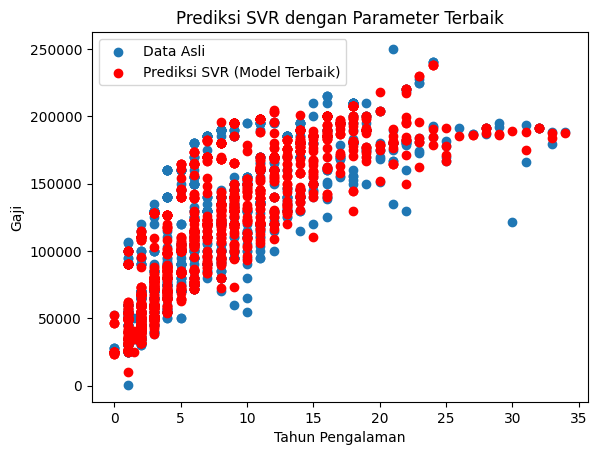

In [112]:
# Menentukan parameter terbaik untuk model
best_params = {'kernel': 'rbf', 'C': 100000, 'gamma': 0.005}

# Menginisialisasi model SVR dengan parameter terbaik
best_model = SVR(**best_params)

# Melatih model dengan data pelatihan
best_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = best_model.predict(X_test)

# Evaluasi performa model
mse = mean_squared_error(y_test, y_pred)
print("Parameter Terbaik:")
print(best_params)
print(f'Mean Squared Error pada Set Pengujian: {mse}')

# Visualisasi hasil prediksi
plt.scatter(X_test['Years of Experience'], y_test, label='Data Asli')
plt.scatter(X_test['Years of Experience'], y_pred, color='red', label='Prediksi SVR (Model Terbaik)')
plt.xlabel('Tahun Pengalaman')
plt.ylabel('Gaji')
plt.title('Prediksi SVR dengan Parameter Terbaik')
plt.legend()
plt.show()